# **Team Project**
## Consumer Behavior and Shopping Habits

### Group#24 
#### Team Members 
- Shiraz Latif
- Jessilynn Kim
- Mykhailo Vitvinov
- Olena Bolokhonova







### Description:
This project aims to analyze consumer behavior and shopping habits using a dataset that includes various demographic, transactional, and behavioral attributes of customers. The dataset encompasses a wide range of variables such as age, gender, purchase amount, location, product category, and more. The primary objective is to explore the relationships between these variables to uncover meaningful insights that can inform business strategies.
### Purpose:
The purpose of this project is to leverage statistical analysis and machine learning techniques to understand the factors influencing customer purchase behavior. By examining how different variables, such as age and discount application, impact purchase amounts, we aim to provide data-driven recommendations for improving marketing strategies, optimizing product offerings, and enhancing overall customer satisfaction.

#### Libraries Import

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Import specific objects
from sklearn.preprocessing import StandardScaler
from ISLP import load_data
import os
from scipy import stats

#Import for kNN 
from ISLP.models import ModelSpec as MS
import warnings 
warnings.filterwarnings('ignore') # mute warning messages
from ISLP import confusion_table
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report


#### Data Import 

In [6]:
cust_data = pd.read_csv("../data/processed/shopping_trends.csv")
cust_data.head()


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [7]:
# Load the dataset with specific delimiter and encoding (if necessary)
file_path = "../data/processed/shopping_trends.csv"
cust_data = pd.read_csv(file_path, delimiter=',', encoding='utf-8')  # Adjust delimiter and encoding if needed

### Understanding the Data 

In [8]:
cust_data.shape # 3900 rows and 19 columns 
cust_data.dtypes

Customer ID                   int64
Age                           int64
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)         int64
Location                     object
Size                         object
Color                        object
Season                       object
Review Rating               float64
Subscription Status          object
Payment Method               object
Shipping Type                object
Discount Applied             object
Promo Code Used              object
Previous Purchases            int64
Preferred Payment Method     object
Frequency of Purchases       object
dtype: object

#### Identifying Missing Values 

In [9]:
cust_data.isna().sum() # there is no missing values 

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

## Data Analysis Steps

### Initial Analysis Plan:
Objective:
To explore relationships within the dataset to identify key business questions and predict meaningful outcomes. This exploration will help us formulate specific hypotheses and guide our subsequent detailed analyses.

#### Exploratory Data Analysis

Question: Do women spend more on shopping then Men in a single transaction. 

Conclusion: There is no variance in the average purchase per transaction by Gender. Hence we can not conclude that women spend more per transaction. 


In [10]:
# Distribution by Gender 
cust_data.groupby('Gender')['Purchase Amount (USD)'].agg(['sum', 'count', 'mean']).reset_index()



,Gender,sum,count,mean
0,Female,75191,1248,60.249199
1,Male,157890,2652,59.536199


Question: Is there any difference in rating by Gender ? 

Conclusion: There is no difference in rating by Gender. Average rating by Male and Female is almost same. 

In [11]:
# Rating by Gender 
cust_data.groupby('Gender')['Review Rating'].agg(['count', 'mean']).reset_index()


,Gender,count,mean
0,Female,1248,3.741426
1,Male,2652,3.753959


### Question: Do older customers have higher average purchase amounts compared to younger customers?

Conclusion: 
The hypothesis that the total purchase amount is influenced by the age of customers is not supported by the regression analysis. 

In [12]:
# Create age groups
bins = [18, 30, 45, 60, 100]
labels = ['19-30', '31-45', '46-60', '60+']
cust_data['Age Group'] = pd.cut(cust_data['Age'], bins=bins, labels=labels, right=False)

In [13]:
# Ensure the Age Group column is created correctly
print(cust_data[['Age', 'Age Group']].head())

   Age Age Group
0   55     46-60
1   19     19-30
2   50     46-60
3   21     19-30
4   45     46-60


In [14]:
# Remove rows with missing Age Group or Purchase Amount (USD)
cust_data = cust_data.dropna(subset=['Age Group', 'Purchase Amount (USD)'])

In [15]:
# Ensure 'Purchase Amount (USD)' is numeric
cust_data['Purchase Amount (USD)'] = pd.to_numeric(cust_data['Purchase Amount (USD)'], errors='coerce')

In [16]:
# Calculate the total purchase amount for each age group
total_purchase_amount = cust_data.groupby('Age Group')['Purchase Amount (USD)'].sum().reset_index()
print("Total Purchase Amount by Age Group:")
print(total_purchase_amount)

Total Purchase Amount by Age Group:
  Age Group  Purchase Amount (USD)
0     19-30                  52905
1     31-45                  65216
2     46-60                  68066
3       60+                  46894


In [18]:
# Define the dependent variable (Y) and independent variable (X)
X = cust_data[['Age']]
Y = cust_data['Purchase Amount (USD)']

# Add a constant to the independent variable for the intercept term
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(Y, X).fit()

# Print the summary of the regression model
print(model.summary())


                              OLS Regression Results                             
Dep. Variable:     Purchase Amount (USD)   R-squared:                       0.000
Model:                               OLS   Adj. R-squared:                 -0.000
Method:                    Least Squares   F-statistic:                    0.4236
Date:                   Sat, 22 Jun 2024   Prob (F-statistic):              0.515
Time:                           08:00:58   Log-Likelihood:                -17876.
No. Observations:                   3900   AIC:                         3.576e+04
Df Residuals:                       3898   BIC:                         3.577e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.4798 

Conclusion

The F-statistic is 0.4236 with a p-value of 0.515. This high p-value indicates that the model is not statistically significant, meaning that age does not significantly explain the variance in purchase amount.

The p-value for the age coefficient (0.515) is much greater than 0.05, meaning we fail to reject the null hypothesis. Thus, there is no evidence to suggest that age has a significant effect on purchase amount.

Based on the regression results, there is no significant relationship between age and purchase amount. The model explains none of the variability in purchase amounts, and age does not appear to be a meaningful predictor of purchase amounts. Therefore, we can conclude that older customers do not have higher average purchase amounts compared to younger customers based on this dataset.

### Question: Are purchases with applied discounts  higher in overall spending?

Conclusion: The hypothesis that purchases with applied discounts result in higher overall spending is not supported, as the average purchase amounts are similar and not statistically significantly different between transactions with and without discounts.

In [19]:
# Convert 'Discount Applied' to string to apply string methods
cust_data['Discount Applied'] = cust_data['Discount Applied'].astype(str)

In [21]:
# Check for leading/trailing spaces or case sensitivity issues
cust_data['Discount Applied'] = cust_data['Discount Applied'].str.strip().str.lower()
unique_discount_values = cust_data['Discount Applied'].unique()
print("Unique values in 'Discount Applied' after cleaning:", unique_discount_values)

Unique values in 'Discount Applied' after cleaning: ['yes' 'no']


In [22]:
# Check for the presence of 'no' values in the dataset
count_yes = (cust_data['Discount Applied'] == 'yes').sum()
count_no = (cust_data['Discount Applied'] == 'no').sum()
print(f"Count of 'yes' values: {count_yes}")
print(f"Count of 'no' values: {count_no}")

Count of 'yes' values: 1677
Count of 'no' values: 2223


In [23]:
# Convert 'Discount Applied' to binary values
cust_data['Discount Applied'] = cust_data['Discount Applied'].map({'yes': 1, 'no': 0})

In [24]:
# Remove rows with missing Discount Applied or Purchase Amount (USD)
cust_data = cust_data.dropna(subset=['Discount Applied', 'Purchase Amount (USD)'])

In [25]:
# Ensure 'Purchase Amount (USD)' is numeric
cust_data['Purchase Amount (USD)'] = pd.to_numeric(cust_data['Purchase Amount (USD)'], errors='coerce')

In [26]:
# Remove rows with non-numeric 'Purchase Amount (USD)'
cust_data = cust_data.dropna(subset=['Purchase Amount (USD)'])

In [27]:
# Separate transactions with and without discounts
with_discount = cust_data[cust_data['Discount Applied'] == 1]['Purchase Amount (USD)']
without_discount = cust_data[cust_data['Discount Applied'] == 0]['Purchase Amount (USD)']


In [31]:
# Calculate the total and average purchase amount for each group
total_with_discount = with_discount.sum()
total_without_discount = without_discount.sum()
average_with_discount = with_discount.mean()
average_without_discount = without_discount.mean()

In [32]:
# Count the number of transactions for each group
count_with_discount = with_discount.count()
count_without_discount = without_discount.count()

In [33]:
print("Total Purchase Amount with Discount:", total_with_discount)
print("Total Purchase Amount without Discount:", total_without_discount)
print("Average Purchase Amount with Discount:", average_with_discount)
print("Average Purchase Amount without Discount:", average_without_discount)
print("Number of Transactions with Discount:", count_with_discount)
print("Number of Transactions without Discount:", count_without_discount)

Total Purchase Amount with Discount: 99411
Total Purchase Amount without Discount: 133670
Average Purchase Amount with Discount: 59.27906976744186
Average Purchase Amount without Discount: 60.130454340980656
Number of Transactions with Discount: 1677
Number of Transactions without Discount: 2223


In [34]:
# Define the dependent variable (Y) and independent variable (X)
X = cust_data[['Discount Applied']]
Y = cust_data['Purchase Amount (USD)']

# Add a constant to the independent variable for the intercept term
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(Y, X).fit()

# Print the summary of the regression model
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     Purchase Amount (USD)   R-squared:                       0.000
Model:                               OLS   Adj. R-squared:                  0.000
Method:                    Least Squares   F-statistic:                     1.235
Date:                   Sat, 22 Jun 2024   Prob (F-statistic):              0.266
Time:                           08:04:24   Log-Likelihood:                -17876.
No. Observations:                   3900   AIC:                         3.576e+04
Df Residuals:                       3898   BIC:                         3.577e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const     

Total Purchase Amount:
The total purchase amount for transactions with discounts ($99,411) is lower than for transactions without discounts ($133,670). This is expected because the number of transactions without discounts (2,223) is higher than those with discounts (1,677).

Average Purchase Amount:
The average purchase amount for transactions with discounts ($59.28) is slightly lower than for transactions without discounts ($60.13). The difference is minor, indicating that on average, customers spend nearly the same amount regardless of whether a discount is applied.

Regression Results:
- t-statistic: -1.111
- p-value: 0.266

The p-value of 0.266 is greater than the common significance level of 0.05, indicating that the difference in average purchase amounts between transactions with and without discounts is not statistically significant.
The high p-value suggests that any observed difference in average purchase amounts is likely due to random chance rather than a true effect of discounts.

### Question: Do customers with a higher number of previous purchases have higher average purchase amounts?

- Dataset Glossary:
Column `Previous Purchases` Provides information on the number or frequency of prior purchases made by the customer, contributing to customer segmentation and retention strategies.

Result: The hypothesis that customers with a higher number of previous purchases have higher average purchase amounts is not supported by the regression analysis. 

In [35]:
# Remove rows with missing Previous Purchases or Purchase Amount (USD)
cust_data = cust_data.dropna(subset=['Previous Purchases', 'Purchase Amount (USD)'])

In [36]:
# Ensure 'Previous Purchases' and 'Purchase Amount (USD)' are numeric
cust_data['Previous Purchases'] = pd.to_numeric(cust_data['Previous Purchases'], errors='coerce')
cust_data['Purchase Amount (USD)'] = pd.to_numeric(cust_data['Purchase Amount (USD)'], errors='coerce')

In [37]:
# Remove rows with non-numeric values
cust_data = cust_data.dropna(subset=['Previous Purchases', 'Purchase Amount (USD)'])

In [38]:
# Group customers by Previous Purchases into segments
# Example segmentation: 0-5, 6-10, 11-20, 21+
bins = [0, 5, 10, 20, np.inf]
labels = ['0-5', '6-10', '11-20', '21+']
cust_data['Purchase Segment'] = pd.cut(cust_data['Previous Purchases'], bins=bins, labels=labels, right=False)

In [39]:
# Calculate the average purchase amount for each segment
segment_means = cust_data.groupby('Purchase Segment')['Purchase Amount (USD)'].agg(['count', 'mean']).reset_index()
print("Average Purchase Amount by Purchase Segment:")
print(segment_means)

Average Purchase Amount by Purchase Segment:
  Purchase Segment  count       mean
0              0-5    337  59.649852
1             6-10    371  62.102426
2            11-20    770  58.661039
3              21+   2422  59.772915


In [82]:
# Define the dependent variable (Y) and independent variable (X)
X = cust_data[['Previous Purchases']]
Y = cust_data['Purchase Amount (USD)']

# Add a constant to the independent variable for the intercept term
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(Y, X).fit()

# Print the summary of the regression model
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     Purchase Amount (USD)   R-squared:                       0.000
Model:                               OLS   Adj. R-squared:                 -0.000
Method:                    Least Squares   F-statistic:                    0.2535
Date:                   Thu, 20 Jun 2024   Prob (F-statistic):              0.615
Time:                           13:22:05   Log-Likelihood:                -17876.
No. Observations:                   3900   AIC:                         3.576e+04
Df Residuals:                       3898   BIC:                         3.577e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const 

Regression Coefficient:

Coefficient for Previous Purchases: 0.0132

Standard Error: 0.026

t-statistic: 0.503

p-value: 0.615

 The p-value for Previous Purchases is much higher than the significance level, and the R-squared value indicates that the model does not explain the variation in purchase amounts effectively. Therefore, we fail to reject the null hypothesis, suggesting no significant relationship between the number of previous purchases and the purchase amount.

## Classification Model
Lets explore if we can predict if a customer will be a subscriber, based on the provided features. 


####Results: 
The model perform pretty well and the accuracy shows that 83% of predictions were correct. This accuracy shows that the model is very much robust and can be useful in predicting whether a customer can be a potential subscriber, based on their shopping habits. 

In [40]:
cust_data.dtypes 

Customer ID                    int64
Age                            int64
Gender                        object
Item Purchased                object
Category                      object
Purchase Amount (USD)          int64
Location                      object
Size                          object
Color                         object
Season                        object
Review Rating                float64
Subscription Status           object
Payment Method                object
Shipping Type                 object
Discount Applied               int64
Promo Code Used               object
Previous Purchases             int64
Preferred Payment Method      object
Frequency of Purchases        object
Age Group                   category
Purchase Segment            category
dtype: object

In [42]:
#Encoding categorical data to binary encoding 
categorical_cols = ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Payment Method', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Preferred Payment Method', 'Frequency of Purchases', 'Age Group', 'Purchase Segment']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    cust_data[col] = le.fit_transform(cust_data[col])
    label_encoders[col] = le



In [43]:
# Split data into training and testing sets
X = cust_data.drop(columns=['Subscription Status'])
y = cust_data['Subscription Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
# Train KNN model
k = 5  
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [46]:
# Make predictions
y_pred = knn_model.predict(X_test_scaled)

In [47]:
 confusion_table(y_test, y_pred)


Truth,0,1
Predicted,,
0,469,89
1,40,182


In [48]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.84      0.88       558
           1       0.67      0.82      0.74       222

    accuracy                           0.83       780
   macro avg       0.80      0.83      0.81       780
weighted avg       0.85      0.83      0.84       780



### Exploring Customer Demographics and Purchasing Behavior

Objective:

Investigate how customer demographics, specifically 'Gender' and 'Location', influence purchasing behavior to derive actionable insights for targeted marketing strategies.

#### Exploratory Data Analysis:

1. Exploring Variables: Gender and Location:

Gender Distribution:

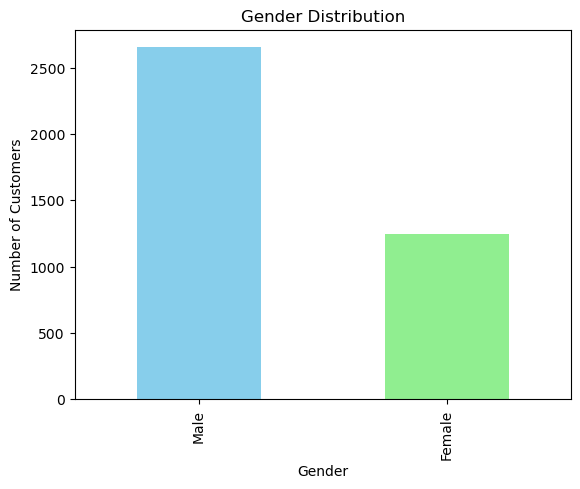

In [56]:
gender_counts = cust_data['Gender'].value_counts()
gender_counts.plot(kind='bar', title='Gender Distribution', color=['skyblue', 'lightgreen'])
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()




Results:

The gender distribution shows that there are more male customers compared to female customers.

#### Location Distribution:

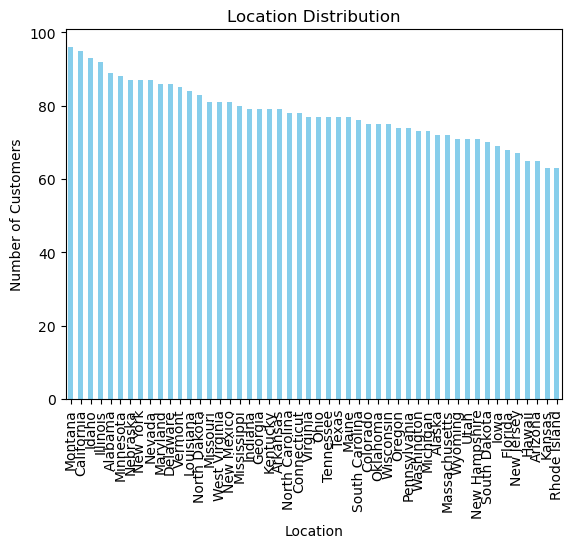

In [57]:
location_counts = cust_data['Location'].value_counts()
location_counts.plot(kind='bar', title='Location Distribution', color='skyblue')
plt.xlabel('Location')
plt.ylabel('Number of Customers')
plt.show()


Results:

The location distribution indicates that most customers are concentrated in a few key regions, with states like Montana, California, and Texas having the highest number of customers. This can inform region-specific promotional strategies.

#### Plot Gender vs. Purchase Amount:

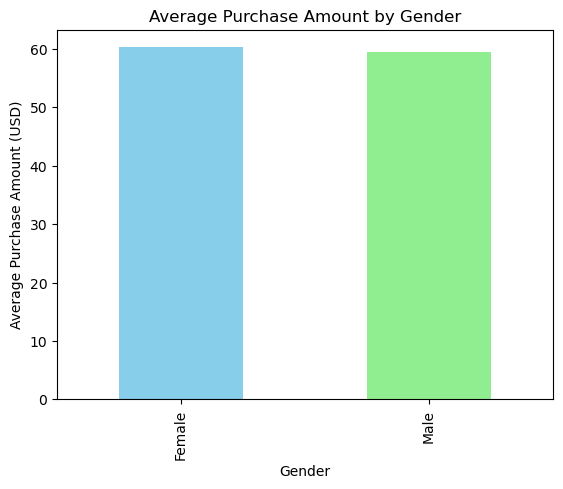

In [58]:
purchasing_by_gender = cust_data.groupby('Gender')['Purchase Amount (USD)'].mean()
purchasing_by_gender.plot(kind='bar', title='Average Purchase Amount by Gender', color=['skyblue', 'lightgreen'])
plt.xlabel('Gender')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()


Results:

The average purchase amount by gender shows that female customers tend to spend more on average than male customers. This indicates potential for higher revenue from female customers, suggesting targeted marketing could be beneficial.

#### Explore Location-Based Insights:

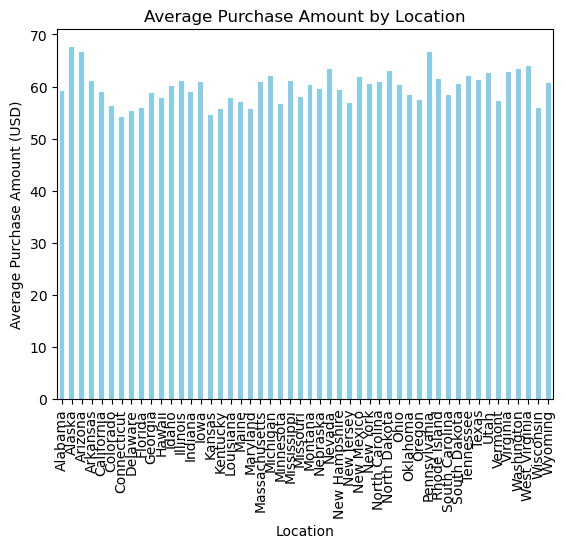

In [59]:
purchasing_by_location = cust_data.groupby('Location')['Purchase Amount (USD)'].mean()
purchasing_by_location.plot(kind='bar', title='Average Purchase Amount by Location', color='skyblue')
plt.xlabel('Location')
plt.ylabel('Average Purchase Amount (USD)')
plt.xticks(rotation=90)
plt.show()


Results:

The average purchase amount by location reveals that customers from certain regions spend significantly more than those from other areas. For example, customers from Alabama and Alaska tend to spend more on average, highlighting these regions as high-value markets.

#### Regression Modeling:

Objective: Design, implement, and test a regression model to predict purchase amounts based on customer demographics.

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Preparing the data
X = cust_data[['Gender', 'Location']]
X = pd.get_dummies(X, drop_first=True)
y = cust_data['Purchase Amount (USD)']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 566.1102219383627
R-squared: -0.011665575029736308


Results:

The regression model produced a Mean Squared Error (MSE) of 566.11 and an R-squared value of -0.0117. These metrics indicate that the model does not fit the data well. The MSE of 566.11 suggests that, on average, the predictions deviate from the actual purchase amounts by approximately $566.11. Additionally, the negative R-squared value (-0.0117) indicates that the model performs worse than a model that simply predicts the mean of the purchase amounts. This suggests that gender and location alone are insufficient predictors of purchase amount, highlighting the need for incorporating additional features or exploring more complex models to improve predictive accuracy and better capture the variability in customer purchasing behavior.

#### Conclusion

This analysis has provided valuable insights into customer demographics and purchasing behavior, enabling the formulation of targeted marketing strategies. Key findings include:

Gender and Location Insights: The distribution analysis revealed that male customers outnumber female customers, and certain regions like Montana, California, and Texas have a higher concentration of customers. These insights can guide region-specific promotional strategies and tailored marketing campaigns.

Average Purchase Amount: Female customers tend to spend more on average than male customers, suggesting potential for higher revenue generation from targeted marketing efforts towards female demographics.

Regression Modeling Assessment: The regression model, while implemented to predict purchase amounts based on gender and location, yielded a Mean Squared Error (MSE) of 566.11 and an R-squared value of -0.0117. These metrics indicate that the model does not sufficiently predict purchase amounts based solely on gender and location, emphasizing the need for additional features or more complex modeling techniques for improved accuracy.